## NN Neural Networks

using ex4data1.mat,ex4weights.mat

In this part,you will implement the **backpropagation algorithm** to learn the parameters for the neural network

### 1.1 Visualizing the data

5000 training examples in ex4data1.mat each training example is a 20pixel by 20pixel grayscale image of the digit: shape of X matrix 5000x400

5000 label examples in ex4weight.mat,'0' digit is labeled as '10',while the digits '1' to '9' are labeled '1' to '9':shape of y matrix 5000x1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
dataWeight=loadmat('ex4weights.mat')
theta1=dataWeight['Theta1']
theta2=dataWeight['Theta2']
dataSet=loadmat('ex4data1.mat')
X=dataSet['X']
y=dataSet['y']
print('dataSet: \n {}'.format(dataSet))

print('X: \n {}'.format(X))

print('y: \n {}'.format(y))

dataSet: 
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
X: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y: 
 [[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [3]:
import matplotlib
def plotDataSet(dataSet):
    
    sampleIndex=np.random.choice(np.arange(dataSet['X'].shape[0]),100)
    sampleImage=dataSet['X'][sampleIndex,:]
    
    fig,ax=plt.subplots(nrows=10,ncols=10,sharex=True,sharey=True,figsize=(12,8))
    for r in range(10):
        for c in range(10):
            ax[r,c].matshow(np.array(sampleImage[r*10+c].reshape((20,20))),cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

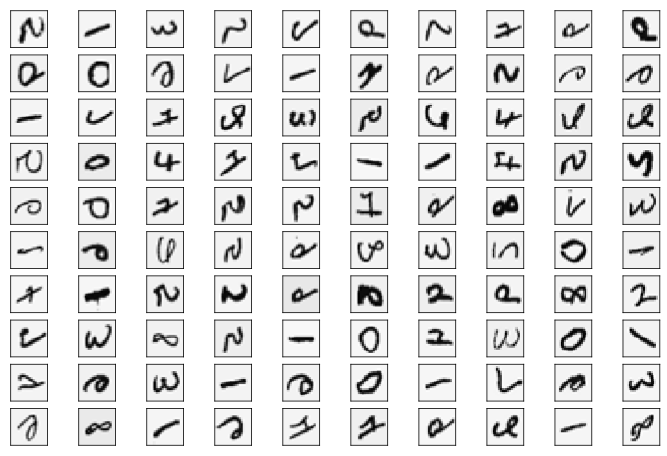

In [4]:
plotDataSet(dataSet)

### 1.2 Model representation

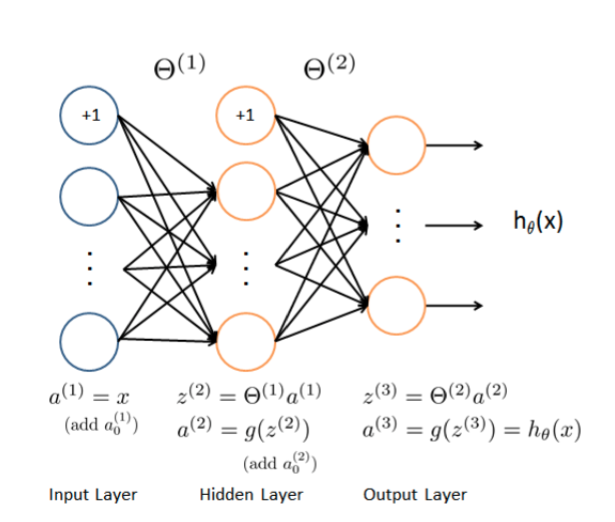

In [5]:
from IPython.display import Image
Image(filename = './nn_model.png', width=500, height=100)

Our neural network is shown in figure.

It has 3 layers,an input layer,a hidden layer and an output layer.

Image are of size 20x20,this give up a 400 input layer units(not count the bias unit)

And the parameters $(\theta_{1},\theta_{2})$ already trained by us.These are stored in ex4weights.mat

### 1.3 Feedforward propagation and cost function

The cost function for the neural network(withourt regularization)is:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y_{k}^{(i)}log((h_{\theta}(x^{(i)}))_{k})-(1-y_{k}^{(i)})log(1-(h_{\theta}(x^{(i)}))_{k})]$


In this part,the label should be one-hot vector

In [6]:
#sklearn
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
ySkOneHot=encoder.fit_transform(y)
print("One-Hot y:\n{}\nThe shape of y is {}".format(ySkOneHot,ySkOneHot.shape))

One-Hot y:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
The shape of y is (5000, 10)


In [7]:
def OneHotEncoder(y):
    res = []
    for i in y:
        yArray = np.zeros(10)
        yArray[i - 1] = 1

        res.append(yArray)

    return np.array(res)
yOneHot=OneHotEncoder(y)
print("One-Hot y:\n{}\nThe shape of y is {}".format(yOneHot,yOneHot.shape))

One-Hot y:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
The shape of y is (5000, 10)


In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def FeedForwardPropagation(theta1,theta2,X):
    w1=np.mat(theta1)
    w2=np.mat(theta2)
    a1=np.mat(X)
    a1=np.insert(a1,0,values=np.ones(a1.shape[0]),axis=1)
    
    z2=a1*w1.T
    a2=sigmoid(z2)
    a2=np.insert(a2,0,values=np.ones(a2.shape[0]),axis=1)
    z3=a2*w2.T
    h=sigmoid(z3) #a3
    
    return a1,z2,a2,z3,h

In [10]:
_,_,_,_,h=FeedForwardPropagation(theta1,theta2,X)
# print("The shape of h:{}\nh:\n{}".format(h.shape,h))
h

matrix([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
         4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
        [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
         2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
        [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
         6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
        ...,
        [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
         2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
        [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
         1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
        [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
         5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [11]:
def cost(theta1,theta2,X,yOneHot):
    m=X.shape[0]
    
    _,_,_,_,h=FeedForwardPropagation(theta1,theta2,X)
    
    term=np.multiply(-yOneHot,np.log(h))-np.multiply((1-yOneHot),np.log(1-h))
    
    return np.sum(term)/m

In [12]:
cost(theta1,theta2,X,yOneHot)

0.2876291651613189

### 1.4 Regularized cost function

The cost function for the neural network(regularization)is:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y_{k}^{(i)}log((h_{\theta}(x^{(i)}))_{k})-(1-y_{k}^{(i)})log(1-(h_{\theta}(x^{(i)}))_{k})]+\frac{\lambda}{2m}[\sum_{j=1}^{25}\sum_{k=1}^{400}(\theta_{j,k}^{(1)})^{2}+\sum_{j=1}^{10}\sum_{k=1}^{25}(\theta_{j,k}^{(2)})^{2}]$

The first layer has 400 input layer.    5000x401(one bais)->5000x26

The second layer has 25 input layer.    5000x26(one bais)->5000x10

In [13]:
def costRe(theta1,theta2,X,yOneHot,C):
    m=X.shape[0]
    
    _,_,_,_,h=FeedForwardPropagation(theta1,theta2,X)
    
    term=np.multiply(-yOneHot,np.log(h))-np.multiply(1-yOneHot,np.log(1-h))
    reg1=C/(2*m)*np.power(theta1[:,1:],2).sum()
    reg2=C/(2*m)*np.power(theta2[:,1:],2).sum()
    
    return np.sum(term)/m+reg1+reg2

In [14]:
costRe(theta1,theta2,X,yOneHot,1)

0.38376985909092365

## Backpropagation

In this part,you will implement the backpropagation algorithm to compute the gradient for the neural network cost function.

### 2.1 Sigmoid gradient

The gradient for the sigmoid function can be computed as:

$g(z)=\frac{1}{1+e^{-z}}$

$g^{'}(z)=\frac{\rm d}{\rm dz}g(z)=g(z)(1-g(z))$

In [15]:
def SigmoidGradient(z):
    return np.multiply(sigmoid(z),1-sigmoid(z))

In [16]:
#When z = 0, the gradi- ent should be exactly 0.2
SigmoidGradient(0)

0.25

### 2.2 Random initialization

It is important to randomly initialize the parameters for symmetry breaking.

One effective strategy is:randomly select values for $\theta^{l}$ uniformly in the range $[-\epsilon_{init},\epsilon_{init}]$ 

You should use $\epsilon_{init}=0.12$

### 2.3 Backpropagation

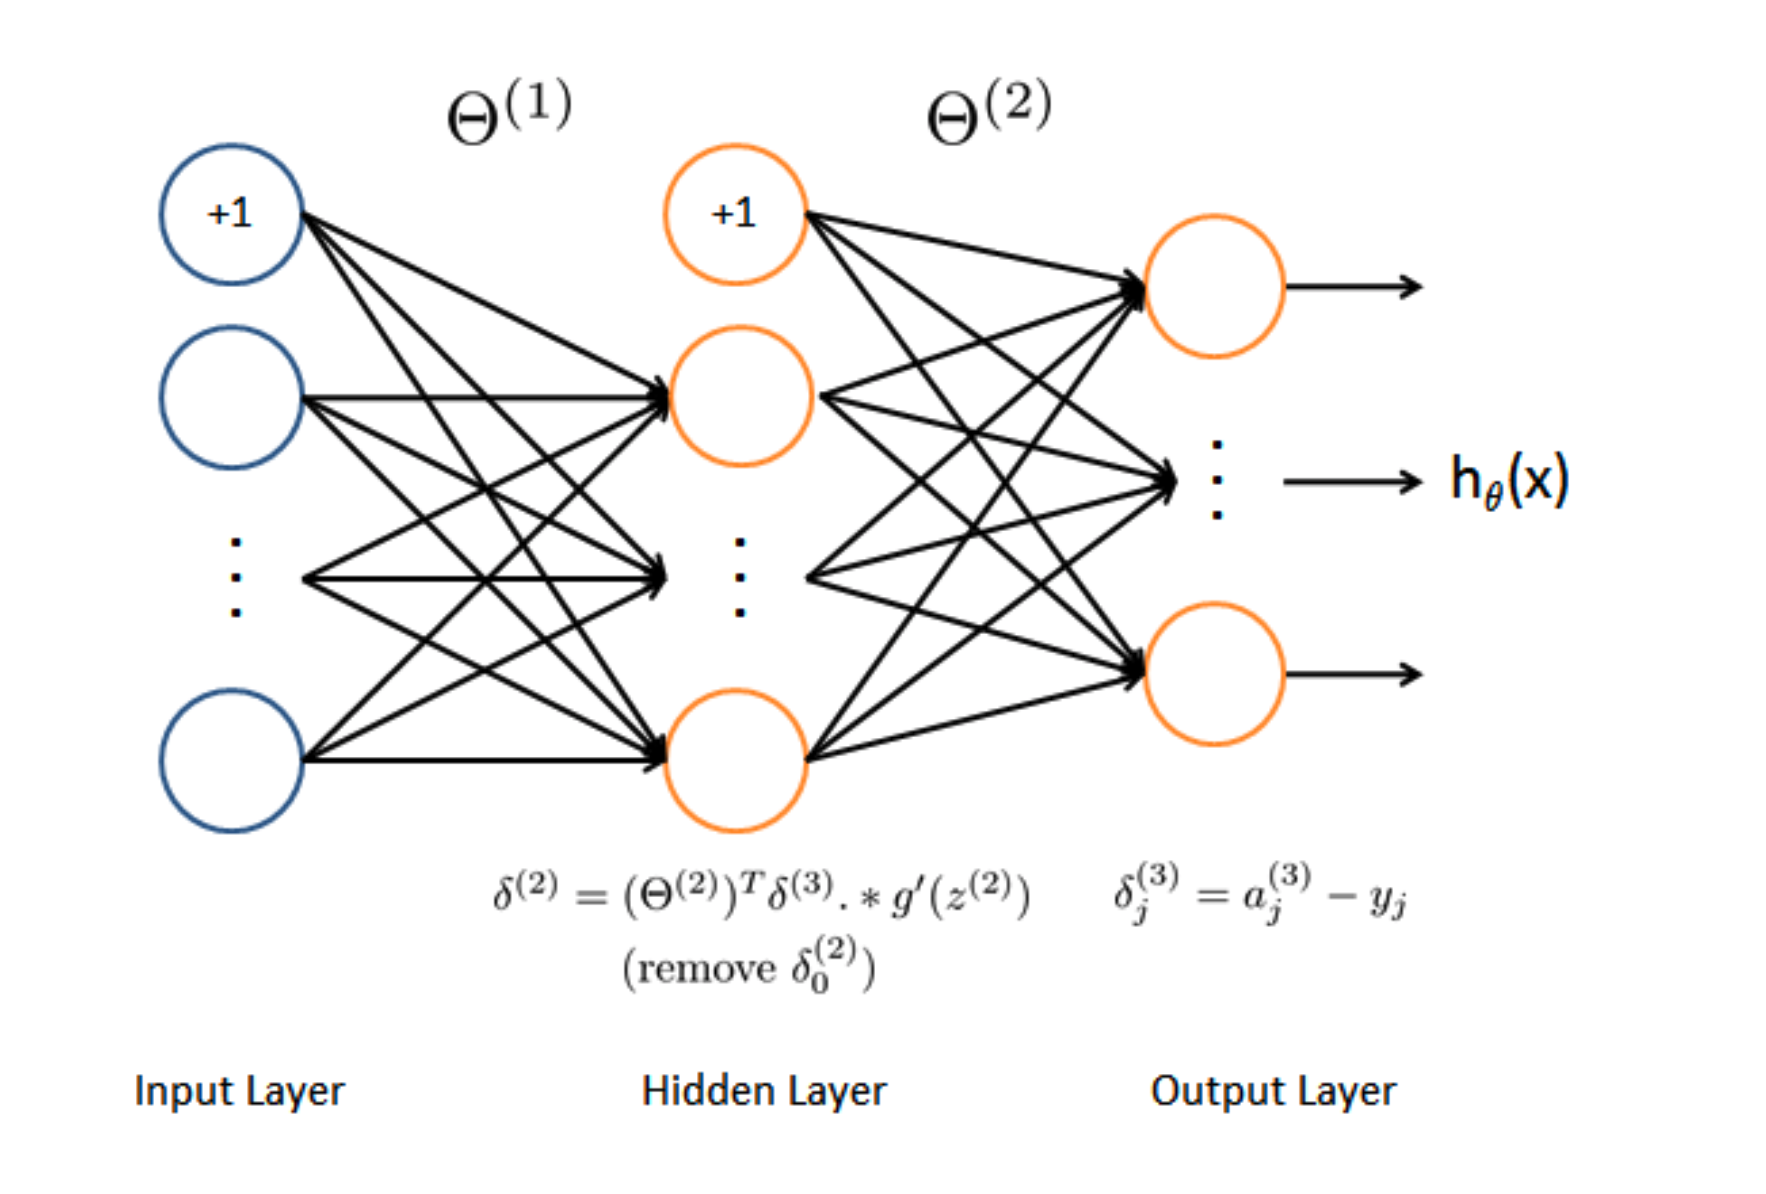

In [17]:
from IPython.display import Image
Image(filename='./bp_nn_model.png',width=500, height=100)

The backpropagation algorithm is as follow:

Step 1).

1.Set the input layer's values $(a^{(1)})$ to the t-th training example $x^{t}$.

2.Then perform a feedforward pass,computing the activations($z^{(2)},a^{(2)},z^{(3)},a^{(3)}$) for layers 2 and 3.

3.Note that you should add a+1 term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit.

Step 2).

1.For each output in output layer(in layer 3),set $\delta_{k}^{(3)}=(a_{k}^{(3)}-y_{k})$

Step 3).

1.For the hidden layer(in layer 2,l=2),set $\delta^{(2)}=(\theta^{(2)})^{T}\delta^{(3)}.*g'(z^{(2)})$

Step 4).

1.Accumulate the gradient from this example using the following formula:$\Delta^{(l)}=\Delta^{(l)}+\delta^{l+1}(a^{l})^{T}$.

2.Note that you should remove the $\delta_{0}^{(2)}$.

Step 5).

1.Obtain the(unregularized) gradient for the neural network cost function by dividing the accumulated gradients by $\frac{1}{m}$.

$\frac{\partial}{\partial\theta_{ij}^{(l)}}J(\theta)=D_{(ij)}^{l}=\frac{1}{m}\Delta_{ij}^{(l)}$

In [18]:
def backPropagation(params,inputSize,hiddenSize,numLabels,X,y,C):
    """
    
    :theta1 :
    :theta2 :
    :X :
    :y : One-Hot vector
    :C : learning rate
    """    
    X=np.mat(X)
    y=np.mat(y)
    
    #Initialization
    m=X.shape[0]
    theta1=np.mat(np.reshape((params[:hiddenSize*(inputSize+1)]),(hiddenSize,inputSize+1)))
    theta2=np.mat(np.reshape((params[hiddenSize*(inputSize+1):]),(numLabels,hiddenSize+1)))
    J=0
    delta1=np.zeros(theta1.shape)
    delta2=np.zeros(theta2.shape)
    
    #Step 1.
    a1,z2,a2,z3,h=FeedForwardPropagation(theta1,theta2,X)
   
    #Compute the cost
    J=costRe(theta1,theta2,X,y,C)

    
    #Perform the backpropagation
    for t in range(m):
        a1t=a1[t,:]
        z2t=z2[t,:]
        a2t=a2[t,:]
        ht=h[t,:]
        yt=y[t,:]
        #Step 2.
        d3t=ht-yt

        #Step 3.
        z2t=np.insert(z2t,0,values=np.ones(1))
        d2t=np.multiply((theta2.T*d3t.T).T,SigmoidGradient(z2t))
        
        #Step 4.
        delta1+=d2t[:,1:].T*a1t #The first column is bias term
        delta2+=d3t.T*a2t
    #Step 5.
    delta1/=m
    delta2/=m
    
    return J,delta1,delta2

In [19]:
inputSize=400
hiddenSize=25
numLabels=10
X=X
y=yOneHot
C=1
params=(np.random.random(size=hiddenSize * (inputSize + 1) + numLabels * (hiddenSize + 1)) - 0.5) * 0.25

J,d1,d2=backPropagation(params,inputSize,hiddenSize,numLabels,X,y,C)

In [20]:
print(J,d1.shape,d2.shape)

7.3576849055848745 (25, 401) (10, 26)


### 2.4 Gradient checking

...

### 2.5 Regularized Neural Networks

Specifically,after you have computed $\Delta_{ij}^{(l)}$ using backpropagation,you should add regularization using:

$\frac{\partial}{\partial\theta_{ij}^{(l)}}=D_{ij}^{(l)}=\frac{1}{m}\Delta_{ij}^{(l)}$ for j=0

$\frac{\partial}{\partial\theta_{ij}^{(l)}}=D_{ij}^{(l)}=\frac{1}{m}\Delta_{ij}^{(l)}+\frac{\lambda}{m}\theta_{ij}^{(l)}$ for j$\geq$1

Note that you should not be rugularing the first column of $\theta^{(l)}$

In [21]:
def backPropagationRe(params,inputSize,hiddenSize,numLabels,X,y,C):
    """
    
    :theta1 :
    :theta2 :
    :X :
    :y : One-Hot vector
    :C : learning rate
    """    
    X=np.mat(X)
    y=np.mat(y)
    
    #Initilization
    m=X.shape[0]
    theta1=np.mat(np.reshape(params[:hiddenSize*(inputSize+1)],(hiddenSize,inputSize+1)))
    theta2=np.mat(np.reshape(params[hiddenSize*(inputSize+1):],(numLabels,hiddenSize+1)))
    delta1=np.zeros(theta1.shape)
    delta2=np.zeros(theta2.shape)
    J=0
    
    #Compute the cost
    J=costRe(theta1,theta2,X,y,C)
    
    #Step 1.
    a1,z2,a2,z3,h=FeedForwardPropagation(theta1,theta2,X)
    
    #Perform the backpropagation
    for t in range(m):
        a1t=a1[t,:]
        z2t=z2[t,:]
        a2t=a2[t,:]
        ht=h[t,:]
        yt=y[t,:]
        
        #Step 2.
        d3t=ht-yt
        
        #Step 3.
        z2t=np.insert(z2t,0,values=np.ones(1))
        d2t=np.multiply((theta2.T*d3t.T).T,SigmoidGradient(z2t))
        
        #Step 4.
        delta1+=d2t[:,1:].T*a1t
        delta2+=d3t.T*a2t
        
    #Step 5.
    delta1=delta1/m
    delta2=delta2/m
    
    #Add regularization term
    delta1[:,1:]+=C/m*theta1[:,1:]
    delta2[:,1:]+=C/m*theta2[:,1:]
    
    grad=np.concatenate((np.ravel(delta1),np.ravel(delta2)))
    
    return J,grad

In [22]:
%%time
J,grad=backPropagationRe(params,inputSize,hiddenSize,numLabels,X,y,C)

print(J,grad.shape)

7.3576849055848745 (10285,)
CPU times: user 1.28 s, sys: 90.7 ms, total: 1.37 s
Wall time: 745 ms


In [23]:
%%time
from scipy.optimize import minimize

fmin=minimize(fun=backPropagationRe,x0=params,args=(inputSize,hiddenSize,numLabels,X,y,C),
             method='TNC',jac=True,options={'maxiter':250})
fmin

CPU times: user 5min 26s, sys: 24.4 s, total: 5min 51s
Wall time: 3min 20s


     fun: 0.35482817757608004
     jac: array([-1.56674318e-04,  1.69122653e-07, -4.86384190e-08, ...,
        1.04806263e-05, -2.22748972e-05, -1.38387901e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 25
  status: 3
 success: False
       x: array([ 3.88858091e-01,  8.45613266e-04, -2.43192095e-04, ...,
       -1.34288841e+00, -8.99096874e-01,  2.53274994e+00])

In [24]:
#Predict
X = np.mat(X)
theta1 = np.mat(np.reshape(fmin.x[:hiddenSize * (inputSize+ 1)], (hiddenSize, (inputSize + 1))))
theta2 = np.mat(np.reshape(fmin.x[hiddenSize * (inputSize + 1):], (numLabels, (hiddenSize + 1))))

a1, z2, a2, z3, h = FeedForwardPropagation(theta1,theta2,X)
yPred= np.array(np.argmax(h, axis=1) + 1)
print("The prediction of y:\n{}".format(yPred))

The prediction of y:
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [25]:
from sklearn.metrics import classification_report
y=dataSet['y']
print(classification_report(yPred,y))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       505
           2       0.99      0.99      0.99       500
           3       0.99      0.99      0.99       497
           4       0.99      0.99      0.99       496
           5       1.00      1.00      1.00       499
           6       0.99      1.00      0.99       498
           7       0.99      0.99      0.99       501
           8       1.00      0.99      1.00       502
           9       0.98      0.99      0.99       498
          10       1.00      0.99      0.99       504

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



## Visualizing the hidden layer

In [26]:
HiddenLayerTheta=theta1[:,1:]
print(HiddenLayerTheta.shape)

(25, 400)


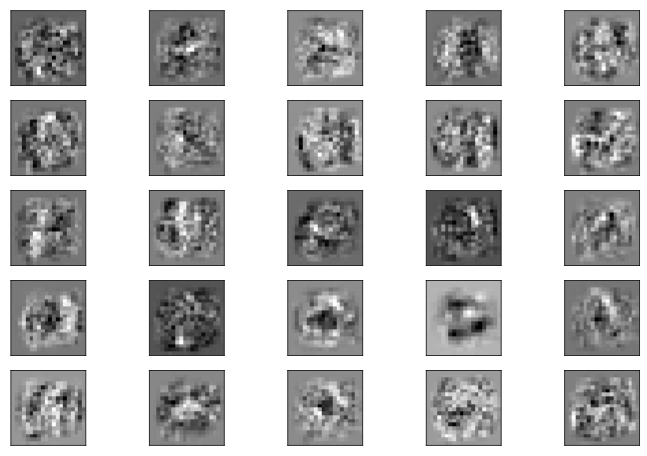

In [27]:
fig,ax=plt.subplots(figsize=(12,8),nrows=5,ncols=5,sharey=True,sharex=True)
for r in range(5):
    for c in range(5):
        ax[r,c].matshow(np.array(HiddenLayerTheta[5*r+c].reshape((20,20))),cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))